<a href="https://colab.research.google.com/github/Dmitriy6655/Sem2_Machine_learning-Lin.regressiya-/blob/main/Sem2_Machine_learning(Lin_regressiya).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Метод наименьших квадратов

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


In [3]:
x=np.array([1,2,3,4,5])
y=np.array([1,2,3,4,5])
y1=np.array([1,2,3,4,5])
y2=np.array([1,1,4,9,0])


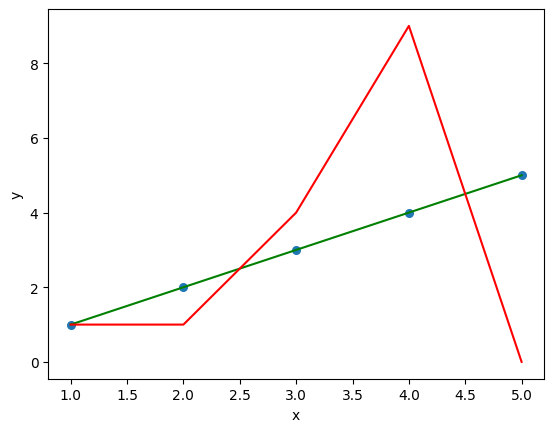

In [4]:
plt.scatter(x, y, s=30)
plt.plot(x,y1,'g')
plt.plot(x,y2,'r')

plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [5]:
error1=sum(y1-y)
error2=sum(y2-y)
print(error1)
print(error2)

0
0


In [6]:
error1=sum((y1-y)**2)
error2=sum((y2-y)**2)
print(error1)
print(error2)

0
52


###Пример 1

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split #метод для раздления выборки
from sklearn.linear_model import LinearRegression #объект линейной ргрессии

In [8]:
np. random.seed(0)
x= np.random.rand(1000,1)
y=1+4*x+np.random.rand(1000,1)

d={'x':x.reshape(1,1000)[0],'y':y.reshape(1,1000)[0]}
df=pd.DataFrame(data=d)
df.head()

,x,y
0,0.548814,3.788134
1,0.715189,3.870821
2,0.602763,3.886880
3,0.544883,3.888303
4,0.423655,2.738595


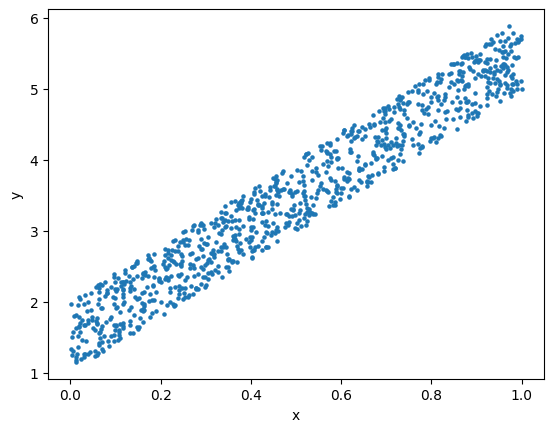

In [9]:
plt.scatter(df['x'],df['y'], s=5)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Теперь найдем зависимость при помощи линейной регрессии, для этого поделим нашу выборку на обучающую(70% данных ) и тестовую(30% данных).Поделим 1000 точк на две структурв (2 DataFrame).Это делается для того чтобы наша модель не переобучалась.

In [10]:
train, test = train_test_split(df, train_size=0.7, random_state=123)


Создадим экземпляр класса линейной регрессии:

In [11]:
model = LinearRegression()
#обучим модель на наших данных при помощи метода fit()
model.fit(train[['x']], train[['y']])



LinearRegression()

Метод fit() это некая примерка x к y.
Теперь проверим, что получилось в результате обучения:

In [12]:
print('w0', model.intercept_)
print('w1', model.coef_)

w0 [1.50837825]
w1 [[4.02648445]]


Если мы подставим эти значения в формулу y = 1+4x, то мы найдем любое значение y. 1 -это w0, 4 - w1.
Проверим результат обучения.Для этого вызовем метод predict, который поможет спрогнозировать какие-либо числа.


In [13]:
y_predict_train = model.predict(train[['x']])
print(y_predict_train[:,0][:10])

[2.5086112  2.04014842 4.21436829 3.02939015 5.15860986 1.62897276
 2.53087032 2.04183765 1.55554482 2.92526992]


Теперь проверим результат предсказаний:

In [14]:
y_predict_train=model.intercept_+model.coef_*train[['x']]
print(y_predict_train[:10])


            x
498  2.508611
243  2.040148
314  4.214368
202  3.029390
300  5.158610
682  1.628973
230  2.530870
306  2.041838
166  1.555545
620  2.925270


Построи график модели:


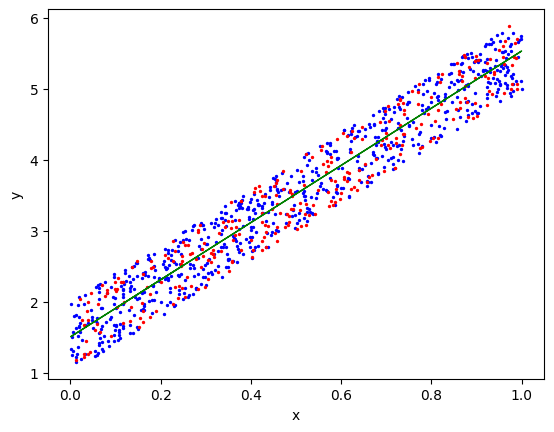

In [15]:
plt.plot(train['x'], y_predict_train, linewidth=1, c='g')
plt.scatter(train['x'],train['y'], s=2, c='b')
plt.scatter(test['x'],test['y'], s=2, c='r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


Линия на графике это зависимость, которая максимально точно отражает зависимость y и x.Эта линия проведена максимально средне от всех значений.



###Домашнее задание 2
Пусть у нас имеется некоторый набор данных sales.csv о продажах квартир.
* цена продажи (SalePrice, зависимая переменная),
* наземная жилая зона (GrLivArea),
* общее качество (Overall Quality),
* территория гаража (GarageArea),
* условия сделки (SaleCondition).

 Реализуйте построение модели линейной регрессии на этих данных. Проверьте качество модели на обучающей и тестовой выборках с помощью MAE, MSE.

In [27]:
import pandas
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import DataFrame
# из модуля model_selection библиотеки sklearn импортируем функцию train_test_split
from sklearn.model_selection import train_test_split






In [37]:
data=pandas.read_csv('sales.csv')
x = DataFrame(data,columns=['GrLivArea'])
y = DataFrame(data,columns=['SalePrice'])
df=pd.DataFrame(data)
df.head()

,SalePrice,GrLivArea,GarageArea,OverallQual,Street,SaleCondition
0,208500,1710,548,7,Pave,Normal
1,181500,1262,460,6,Pave,Normal
2,223500,1786,608,7,Pave,Normal
3,140000,1717,642,7,Pave,Abnorml
4,250000,2198,836,8,Pave,Normal


In [18]:
df.info()#метод обнаружения пропусков в данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SalePrice      1460 non-null   int64 
 1   GrLivArea      1460 non-null   int64 
 2   GarageArea     1460 non-null   int64 
 3   OverallQual    1460 non-null   int64 
 4   Street         1460 non-null   object
 5   SaleCondition  1460 non-null   object
dtypes: int64(4), object(2)
memory usage: 68.6+ KB


Применив метод info() пропусков не обнаружено, т.к. количество вхождений каждого параметра совпадает с общим количеством 1460=1460.

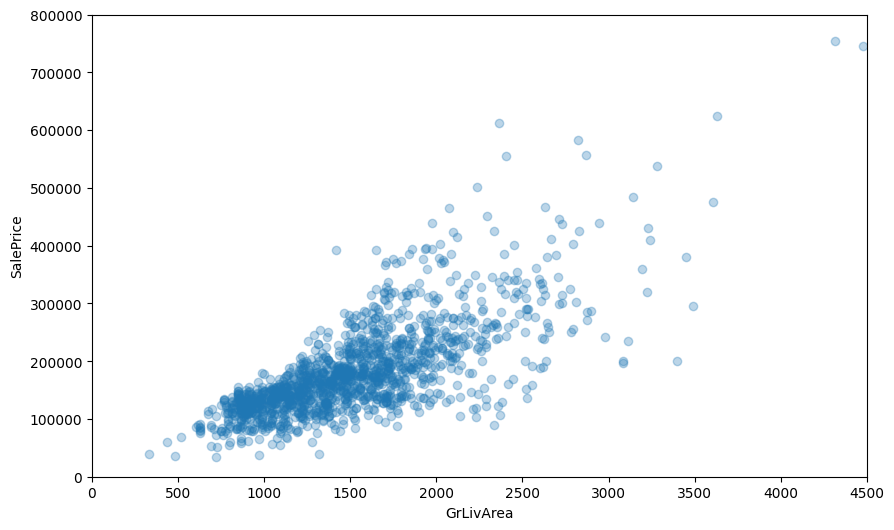

In [41]:
plt.figure(figsize=(10,6))

plt.scatter(x, y, alpha=0.3)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.xlim(0,4500)
plt.ylim(0,800000)

plt.show()

In [43]:
model = LinearRegression()
model.fit(x,y)


LinearRegression()

In [44]:
#Выведем значение коэффициента признака:
model.coef_

array([[107.13035897]])

coef_ — представляют собой w1, ..., wk

Выведем свободный коэффициент W0 (смещение, сдвиг, bais):

In [45]:
model.intercept_

array([18569.02585649])

Примерное значение W₀ = 107.13 показывает, что ваша модель предсказывает ответ 107.13 при x, равном нулю. Равенство W₁ = 18569 означает, что предсказанный ответ возрастает до 18569 при x, увеличенном на единицу.

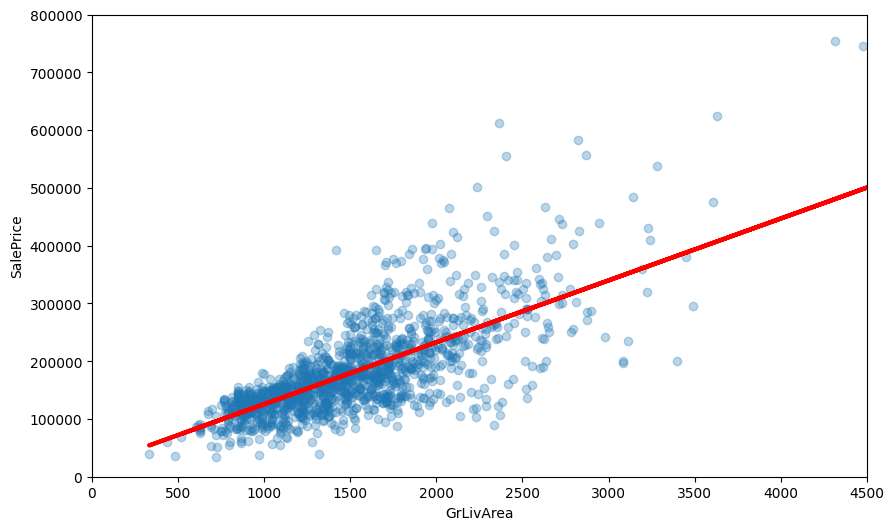

In [49]:
plt.figure(figsize=(10,6))

plt.scatter(x, y, alpha=0.3)
plt.plot(x, model.predict(x), color='red', linewidth=3)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.xlim(0,4500)
plt.ylim(0,800000)

plt.show()

Разделим данные на обучающую (70%) и тестовую выборки данных:

In [65]:
train, test = train_test_split(df, train_size=0.7, random_state=45)

Далее снова построим модель но уже с учетом вышеописанного разделения на train и test.

In [68]:
model_2 = LinearRegression()
model_2.fit(train[['GrLivArea']], train[['SalePrice']])

LinearRegression()

Выведем коэффициенты (веса).Веса - это коэф. того, насколько важен каждый признак для прогнозировния целевой переменной.В нашем случае SalePrice.

In [74]:
print('w0 ', model_2.intercept_)
print('w1 ', model_2.coef_)

w0  [20429.94364526]
w1  [[105.79559203]]


Сделаем прогноз на обучающей выборке:

In [80]:
y_predict_train = model_2.predict(train[['GrLivArea']])
print(y_predict_train[:,0][:5])

[298037.57714454 124850.19298359 105489.59964123 198166.5382637
 127071.90041632]


Сделаем прогноз на тестовой выборке:

In [81]:
y_predict_test = model_2.predict(test[['GrLivArea']])
print(y_predict_test[:,0][:5])

[152674.43368874 116703.93239691 198589.72063184 259845.36841998
 223874.86712815]


Рассчитаем MSE по тестовой выборке:

In [86]:
# импортируем функцию корня среднеквадратической ошибки
from sklearn.metrics import root_mean_squared_error

# в этот раз сравним тестовые и прогнозные значения цен
print('MSE =', root_mean_squared_error(test[['GrLivArea']], y_predict_test))

MSE = 187757.0356250485


Расситаем MAE:

In [85]:
from sklearn.metrics import mean_absolute_error
t1=mean_absolute_error(test[['GrLivArea']], y_predict_test)
print('MAE = ', t1)


MAE =  180139.14204927182
